In [ ]:
#### Analyse zur Vorhersage von Schülerprüfungsnoten basierend auf individuellen und schulische Faktoren
## Betreuender Professor: Prof. Dr. Alexander Rossmann 
## Verfasser des Jupyter Notebooks: Selin Yildirim (814319) 
## Daten zur Verfügunggestellt von Kaggle, unter: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [3]:
# Problem- und Fragestellungen

# Die Schülerprüfungsleistungen werden von verschiedenen Faktoren wie Lernzeit, Anwesenheit und außerschulischen Aktivitäten beeinflusst. Die Herausforderung besteht darin, diese Variablen in einem maschinellen Lernmodell zu integrieren, um genaue Vorhersagen über die Prüfungsnoten zu treffen. Gleichzeitig soll herausgefunden werden, welche Merkmale den größten Einfluss auf die Leistung haben, um datengestützte Entscheidungen zur Verbesserung der Förderung zu treffen.
## 1. Wie können wir die vorhandenen Daten nutzen, um die Prüfungsnoten der Schüler präzise vorherzusagen?
## 2. Welche Faktoren stehen in einem signifikanten Zusammenhang mit der Leistung der Schüler?
## 3. Welche Erkenntnisse aus der Analyse können Schulen dabei helfen, die Förderung und Unterstützung von Schülern zu verbessern?

In [7]:
# Ziel 
## Das Ziel dieser Analyse ist es, die Faktoren zu identifizieren, die die Prüfungsleistungen der Schüler am stärksten beeinflussen. Mithilfe von maschinellem Lernen möchten wir präzise Vorhersagen für die Prüfungsnoten treffen, um datenbasierte Einblicke zu gewinnen. Diese Ergebnisse sollen der Schule helfen, gezielte Maßnahmen zur Unterstützung und Förderung der Schüler zu entwickeln. Dieser Datensatz enthält verschiedene Faktoren, die die Prüfungsleistung von Schülern beeinflussen. Ziel ist es, die Prüfungsnote (Exam_Score) vorherzusagen und die einflussreichsten Merkmale zu identifizieren.

In [9]:
## Importieren der benötigten Librarys

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
## Einspielen der Daten und die erste Analyse des Datensatzes

In [15]:
data_path = 'StudentPerformanceFactors.csv'
data = pd.read_csv(data_path)
# Anzeigen der ersten Reihen des Datensatzes
print(data.head(10))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No          

In [17]:
# Datenvorbereitung
## Wir identifizieren Spalten mit fehlenden Werten

In [19]:
print("Fehlende Werte:\n", data.isnull().sum())

Fehlende Werte:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [21]:
# Überprüfung auf Duplikate

In [23]:
if data.duplicated().any():
    print("Wir erkennen, dass der Datensatz Duplikate enthält. Diese könnten die Analyse beeinflussen und sollten entfernt oder untersucht werden.")
    data = data.drop_duplicates()
else:
    print("Wir erkennen, dass der Datensatz keine Duplikate enthält.")

Wir erkennen, dass der Datensatz keine Duplikate enthält.


In [25]:
# Identifikation von Datentypen
## Wir teilen die Variablen in numerische und kategorische auf

In [27]:
# Identifikation von numerischen und kategorischen Werten
categorical_columns = data.select_dtypes(include=['object']).columns

In [29]:
# Wir teilen die Variablen in numerische und kategorische auf, da maschinelles Lernen unterschiedliche Arten von Daten unterschiedlich behandelt. Kategorische Variablen müssen oft umkodiert werden, während numerische direkt verarbeitet werden können.
numerical_columns = data.select_dtypes(include=['number']).columns
print(f"Wir erkennen, dass die folgenden Spalten kategorisch sind: {categorical_columns.tolist()}")
print(f"Wir erkennen, dass die folgenden Spalten numerisch sind: {numerical_columns.tolist()}")

Wir erkennen, dass die folgenden Spalten kategorisch sind: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Wir erkennen, dass die folgenden Spalten numerisch sind: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [31]:
data = data.copy()
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0])
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0])

In [33]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [35]:
# Explorative Datenanalyse

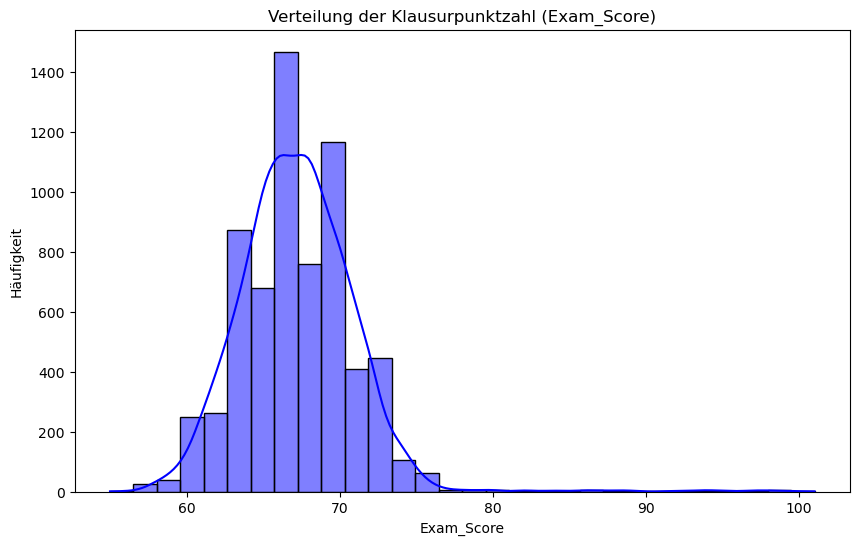

In [39]:
# Histogramm der Zielvariable 
## Wir betrachten die Verteilung der Klausurpunktzahl
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=30, color='blue')
plt.title("Verteilung der Klausurpunktzahl (Exam_Score)")
plt.xlabel("Exam_Score")
plt.ylabel("Häufigkeit")
plt.show()

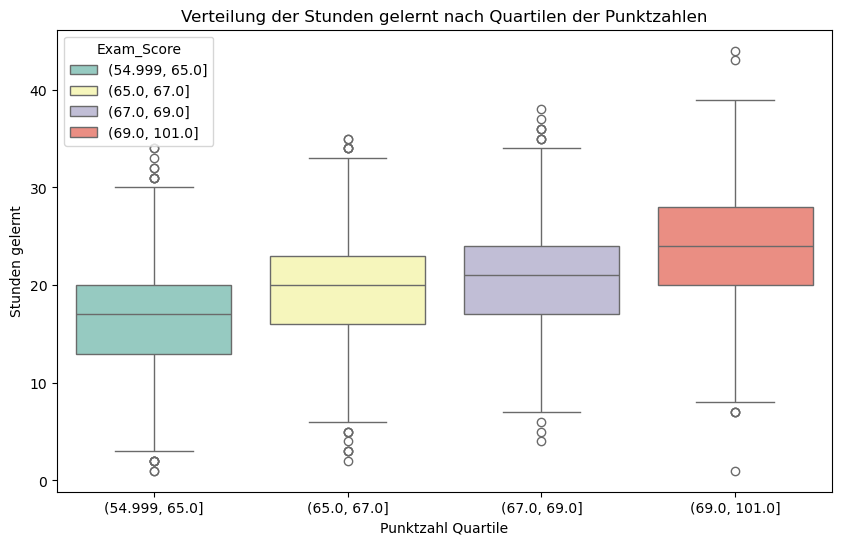

In [41]:
# Boxplot Verteilung der Stunden gelernt nach Quartilen der Klausurpunktzahlen
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(data['Exam_Score'], q=4, duplicates='drop'), y=data['Hours_Studied'], hue=pd.qcut(data['Exam_Score'], q=4, duplicates='drop'), palette="Set3", dodge=False)
plt.title("Verteilung der Stunden gelernt nach Quartilen der Punktzahlen")
plt.xlabel("Punktzahl Quartile")
plt.ylabel("Stunden gelernt")
plt.show()

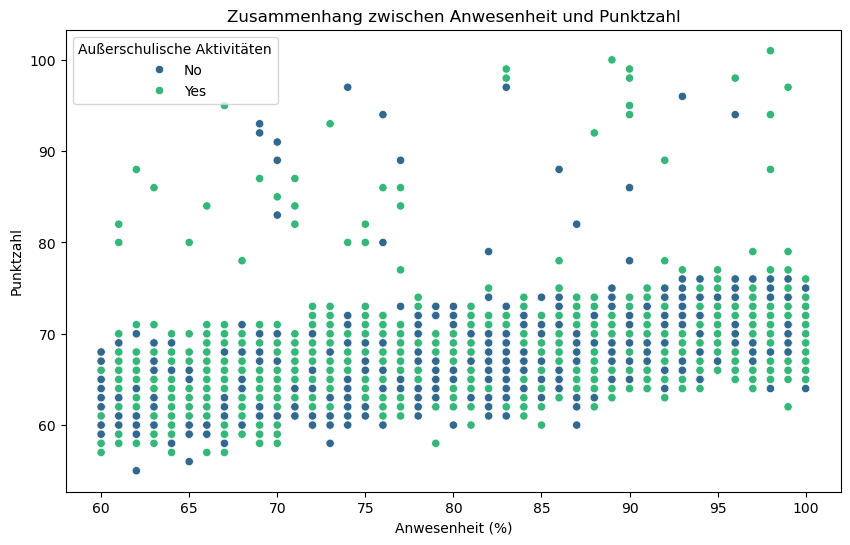

In [43]:
# Scatterplot Zusammenhang zwischen Anwesenheit und Punktzahl
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Attendance'], y=data['Exam_Score'], hue=data['Extracurricular_Activities'], palette="viridis")
plt.title("Zusammenhang zwischen Anwesenheit und Punktzahl")
plt.xlabel("Anwesenheit (%)")
plt.ylabel("Punktzahl")
plt.legend(title="Außerschulische Aktivitäten")
plt.show()

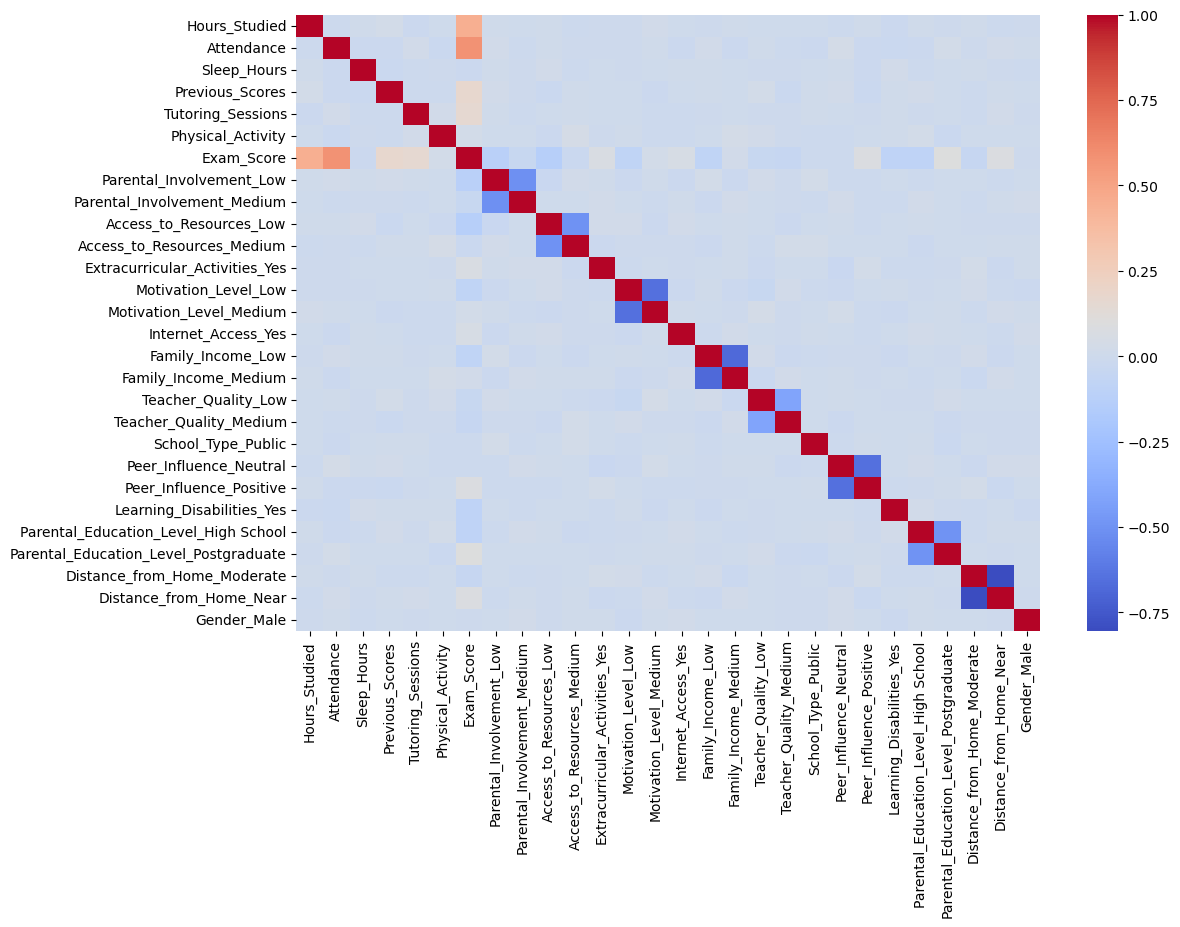

In [45]:
# Korrelationen zwischen Merkmalen und der Zielvariable
## Wir analyisieren Beziehungen zwischen den Variablen
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=False, cmap="coolwarm")
## Die Korrelationsmatrix gibt einen Überblick über Zusammenhänge zwischen Variablen
plt.show()

In [49]:
# Wichtigste Features identifizieren
## Wir finden Variablen mit der stärksten Korrelation zur Klausurpunktzahl
correlation_target = data_encoded.corr()['Exam_Score'].sort_values(ascending=False)
print("Stärkste Korrelationen mit Exam_Score:")
print(correlation_target.head(10))

Stärkste Korrelationen mit Exam_Score:
Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Peer_Influence_Positive                  0.081217
Distance_from_Home_Near                  0.080933
Extracurricular_Activities_Yes           0.064382
Internet_Access_Yes                      0.051475
Name: Exam_Score, dtype: float64


In [51]:
X = data_encoded.drop(columns=['Exam_Score'])
y = data_encoded['Exam_Score']

In [53]:
## Datenaufteilung
### Wir erstellen Trainings- und Testdatensätze

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Modelltraining und Evaluierung
## Wir verwenden ein Random Forest Modell zur Vorhersage

In [59]:
# Random Forest Modell
## Random Forest wurde als Modell gewählt, da es gut mit nichtlinearen Zusammenhängen und kategorialen Daten umgehen kann
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
# Vorhersagen und Evaluierung
rf_predictions = rf_model.predict(X_test)
print("Random Forest - MSE:", mean_squared_error(y_test, rf_predictions))
print("Random Forest - R2 Score:", r2_score(y_test, rf_predictions))

Random Forest - MSE: 4.987182904689864
Random Forest - R2 Score: 0.6471767007776992


In [63]:
# Feature Importance aus dem Random Forest Modell
## Wir finden die wichtigsten Einflussfaktoren.
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Wichtigste Merkmale laut Random Forest:")
print(feature_importances.head(10))

Wichtigste Merkmale laut Random Forest:
Attendance                               0.380896
Hours_Studied                            0.242241
Previous_Scores                          0.092234
Tutoring_Sessions                        0.039065
Sleep_Hours                              0.027021
Physical_Activity                        0.026876
Parental_Involvement_Low                 0.020537
Access_to_Resources_Low                  0.017597
Access_to_Resources_Medium               0.011180
Parental_Education_Level_Postgraduate    0.010913
dtype: float64


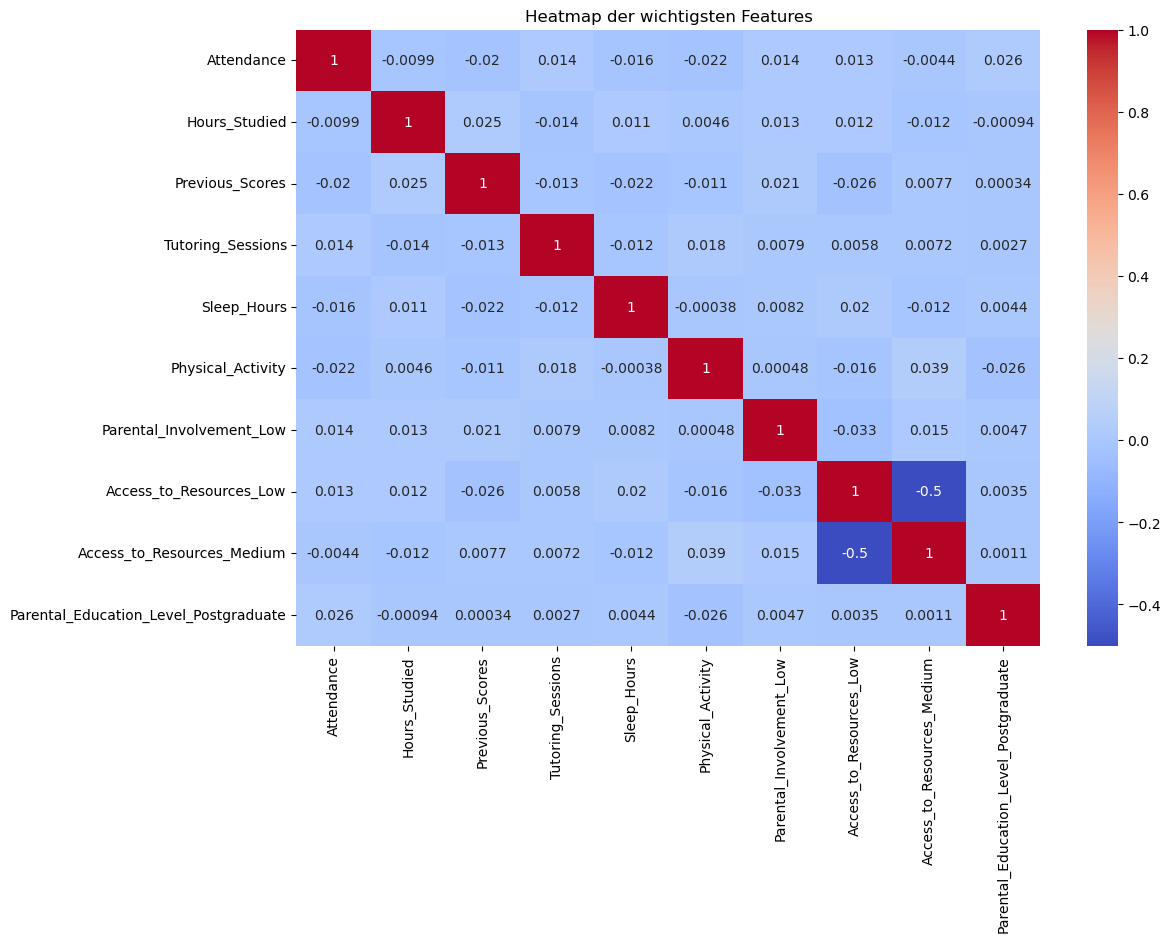

In [65]:
# Heatmap der wichtigsten Features
top_features = feature_importances.head(10).index
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap der wichtigsten Features")
plt.show()

In [67]:
# Lineare Regression
## Wir vergleichen die Leistung eines linearen Modells mit Random Forest

In [71]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Vorhersagen und Evaluierung
lr_predictions = lr_model.predict(X_test)
print("Lineare Regression - MSE:", mean_squared_error(y_test, lr_predictions))
print("Lineare Regression - R2 Score:", r2_score(y_test, lr_predictions))

Lineare Regression - MSE: 3.256019987042895
Lineare Regression - R2 Score: 0.7696495724907311


In [75]:
# Vorhersagevergleich
## Wir betrachten tatsächliche versus vorhergesagte Punktzahlen

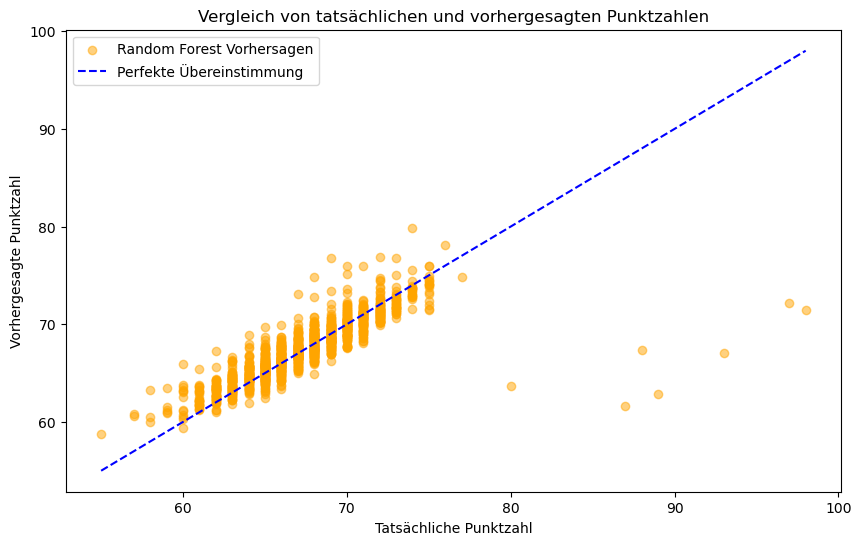

In [77]:
# Vergleich von tatsächlichen und vorhergesagten Prüfungsnoten
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='orange', label="Random Forest Vorhersagen")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='blue', label="Perfekte Übereinstimmung")
plt.title("Vergleich von tatsächlichen und vorhergesagten Punktzahlen")
plt.xlabel("Tatsächliche Punktzahl")
plt.ylabel("Vorhergesagte Punktzahl")
plt.legend()
plt.show()

In [79]:
# Datenbasierter Service für Vorhersagen
print("\n### Datenbasierter Service ###")
# Beispielhafte Eingabedaten eines Schülers
prob_data = {'Hours_Studied': 5, 'Attendance': 75, 'Previous_Scores': 60}  # Beispielhafte Eingabedaten


### Datenbasierter Service ###


In [81]:
# Umwandlung in dasselbe Format wie Trainingsdaten
input_data = pd.DataFrame([prob_data])
input_data = pd.get_dummies(input_data).reindex(columns=X_train.columns, fill_value=0)

In [85]:
# Modellvorhersage
predicted_score = rf_model.predict(input_data)[0]
print(f"Erwartete Klausurpunktzahl: {predicted_score:.2f}")

Erwartete Klausurpunktzahl: 61.65


In [87]:
# Feature Importance anzeigen
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Wichtigste Faktoren für die Vorhersage:")
print(importances.sort_values(ascending=False).head(3))

Wichtigste Faktoren für die Vorhersage:
Attendance         0.380896
Hours_Studied      0.242241
Previous_Scores    0.092234
dtype: float64


In [89]:
# Empfehlungen basierend auf den Ergebnissen
if predicted_score < 70:
    print("Empfehlung: Erhöhen Sie die Lernzeit auf mindestens 8 Stunden pro Woche und verbessern Sie die Anwesenheit auf über 90 %.")
else:
    print("Die Prognose zeigt eine gute Leistung. Weiter so!")

Empfehlung: Erhöhen Sie die Lernzeit auf mindestens 8 Stunden pro Woche und verbessern Sie die Anwesenheit auf über 90 %.


In [91]:
# 6. Ergebnisse und Empfehlungen
print("\nErgebnisse")
print("Die Prüfungsnoten lassen sich mit dem Random Forest Modell genauer vorhersagen als mit der linearen Regression. Die einflussreichsten Merkmale umfassen Stunden gelernt (Hours_Studied), vorherige Noten (Previous_Scores) und Anwesenheit (Attendance). Diese Ergebnisse bieten Ansätze, um die Unterstützung der Schüler gezielt zu verbessern.")


Ergebnisse
Die Prüfungsnoten lassen sich mit dem Random Forest Modell genauer vorhersagen als mit der linearen Regression. Die einflussreichsten Merkmale umfassen Stunden gelernt (Hours_Studied), vorherige Noten (Previous_Scores) und Anwesenheit (Attendance). Diese Ergebnisse bieten Ansätze, um die Unterstützung der Schüler gezielt zu verbessern.
